In [1]:
import numpy as np

from plot_utils import read_Noise2Seg_results, fraction_to_abs, cm2inch

from matplotlib import pyplot as plt
plt.rc('text', usetex=True)

# DSB2018 n10: AP scores on validation data

In [2]:
alpha0_5_n10 = read_Noise2Seg_results('alpha0.5', 'dsb_n10', measure='AP', runs=[1,2,3,4,5],
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [3]:
baseline_dsb_n10 = read_Noise2Seg_results('fin', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

sequential_dsb_n10 = read_Noise2Seg_results('finSeq', 'dsb_n10', measure='AP', runs=[1,2,3,4,5], 
                           fractions=[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 100.0], score_type = '')

In [4]:
plt.rc('font', family = 'serif', size = 16)

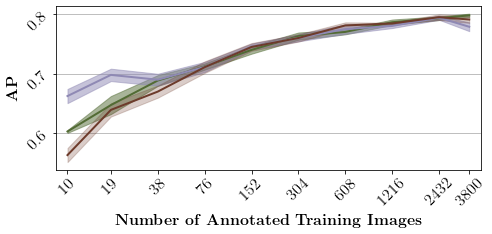

In [5]:
fig = plt.figure(figsize=cm2inch(12.2/2,3)) # 12.2cm is the text-widht of the MICCAI template
plt.rcParams['axes.axisbelow'] = True

plt.plot(fraction_to_abs(sequential_dsb_n10[:, 0], max_num_imgs = 3800), 
         sequential_dsb_n10[:, 1],
         color = '#526B34', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(sequential_dsb_n10[:, 0], max_num_imgs = 3800), 
                 y1 = sequential_dsb_n10[:, 1] + sequential_dsb_n10[:, 2], 
                 y2 = sequential_dsb_n10[:, 1] - sequential_dsb_n10[:, 2], 
                 color = '#526B34', alpha = 0.5, label = r'Sequential Baseline')

plt.plot(fraction_to_abs(alpha0_5_n10[:, 0], max_num_imgs = 3800), 
         alpha0_5_n10[:, 1],
         color = '#8F89B4', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(alpha0_5_n10[:, 0], max_num_imgs = 3800), 
                 y1 = alpha0_5_n10[:, 1] + alpha0_5_n10[:, 2], 
                 y2 = alpha0_5_n10[:, 1] - alpha0_5_n10[:, 2], 
                 color = '#8F89B4', alpha = 0.5, label = r'\textsc{DenoiSeg} ($\alpha = 0.5$)')

plt.plot(fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800), 
         baseline_dsb_n10[:, 1],
         color = '#6D3B2B', alpha = 1, linewidth=2)
plt.fill_between(fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800), 
                 y1 = baseline_dsb_n10[:, 1] + baseline_dsb_n10[:, 2], 
                 y2 = baseline_dsb_n10[:, 1] - baseline_dsb_n10[:, 2], 
                 color = '#6D3B2B', alpha = 0.25, label = r'Baseline ($\alpha = 0$)')


plt.semilogx()

plt.ylabel(r'\textbf{AP}')
plt.xlabel(r'\textbf{Number of Annotated Training Images}')

plt.grid(axis='y')

plt.xticks(ticks=fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800), 
           labels=fraction_to_abs(baseline_dsb_n10[:, 0], max_num_imgs = 3800).astype(np.int),
           rotation=45)
plt.minorticks_off()

plt.yticks(rotation=45)

plt.xlim([8.5, 4500])

plt.tight_layout();

plt.savefig('AP_n10_area.pdf', pad_inches=0.0);
plt.savefig('AP_n10_area.svg', pad_inches=0.0);